In [503]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn import preprocessing as sk_preprocessing
from sklearn.preprocessing import MinMaxScaler

import category_encoders as ce

# Data Reading and Cleaning

In [518]:
#organize the indexes and columns
def pre_process(df):
    column=df.iloc[0]
    df.columns=column
    df=df[1:]
    df=df.drop(['timestamp','day'], axis = 1)
#     df.drop_duplicates(inplace=True)
    return df

In [493]:
def remove_dup(df):
    df.drop_duplicates(inplace=True)
    return df

In [515]:
df11=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Benign\stateless_benign\stateless_features-benign_1.pcap.xlsx',header=None)
df12=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Benign\stateless_benign\stateless_features-benign_2.pcap.xlsx',header=None)

In [ ]:
df11_sf=pd.read_csv(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Benign\stateful_benign\stateful_features-benign_1.pcap.csv',header=None)

In [516]:
df11

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,day,type
1,2020-11-20 13:58:38.988000,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1,1,Benign
2,2020-11-20 13:58:39,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1,1,Benign
3,2020-11-20 13:58:39.991000,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,1,Benign
4,2020-11-20 13:58:40.401000,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132495,2020-11-20 23:21:52.163000,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1,1,Benign
132496,2020-11-20 23:21:52.574000,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1,1,Benign
132497,2020-11-20 23:21:52.987000,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1,1,Benign
132498,2020-11-20 23:21:53.397000,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1,1,Benign


In [513]:
df11=pre_process(df11)
df12=pre_process(df12)

In [514]:
df11.shape

(34473, 15)

In [482]:
day1= pd.concat((df11,df12),ignore_index=True)

In [483]:
day1

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,type
0,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1,Benign
1,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1,Benign
2,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,Benign
3,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,Benign
4,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221068,25,8,0,10,9,2.78622,6,6,7,3.33333,2,192,12,1,Benign
221069,25,8,0,10,9,2.78622,6,6,7,3.33333,2,192,12,1,Benign
221070,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Benign
221071,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Benign


In [484]:
# day1=remove_dup(day1)
# day1

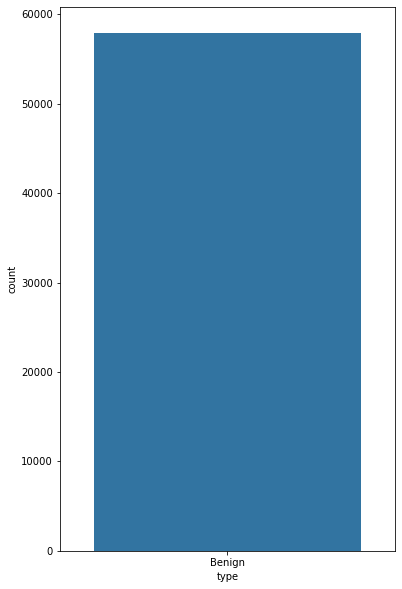

In [273]:
plt.figure(figsize=(6,10))
day1_plot=sns.countplot(x='type', data=day1,color='tab:blue')

In [523]:
df21=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Light Attacks\stateless_light\stateless_features-light_audio.pcap.xlsx',header=None)
df22=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Light Attacks\stateless_light\stateless_features-light_compressed.pcap.xlsx',header=None)
df23=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Light Attacks\stateless_light\stateless_features-light_exe.pcap.xlsx',header=None)
df24=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Light Attacks\stateless_light\stateless_features-light_image.pcap.xlsx',header=None)
df25=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Light Attacks\stateless_light\stateless_features-light_text.pcap.xlsx',header=None)
df26=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Light Attacks\stateless_light\stateless_features-light_video.pcap.xlsx',header=None)
# df27=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Light Attacks\light_benign\stateless_features-light_benign.pcap.xlsx',header=None)

In [524]:
df21=pre_process(df21)
df22=pre_process(df22)
df23=pre_process(df23)
df24=pre_process(df24)
df25=pre_process(df25)
df26=pre_process(df26)
# df27=pre_process(df27)

In [496]:
df27

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,type
1,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1,Benign
2,25,8,0,10,9,2.55664,6,6,7,3.33333,2,192,12,1,Benign
3,25,8,0,10,9,2.55664,6,6,7,3.33333,2,192,12,1,Benign
4,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,Benign
5,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60087,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1,Benign
60088,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Benign
60089,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Benign
60090,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,Benign


In [525]:
day2= pd.concat((df21,df22,df23,df24,df25,df26),ignore_index=True)

In [526]:
day2

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,type
0,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1,Audio
1,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1,Audio
2,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Audio
3,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Audio
4,25,8,0,10,9,2.55664,6,6,7,3.33333,2,192,12,1,Audio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42678,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Video
42679,25,8,0,10,9,2.78622,6,6,7,3.33333,2,192,12,1,Video
42680,25,8,0,10,9,2.78622,6,6,7,3.33333,2,192,12,1,Video
42681,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Video


In [528]:
day2=remove_dup(day2)
# day2=day2.drop(['upper'], axis=1)
day2.shape

(182, 15)

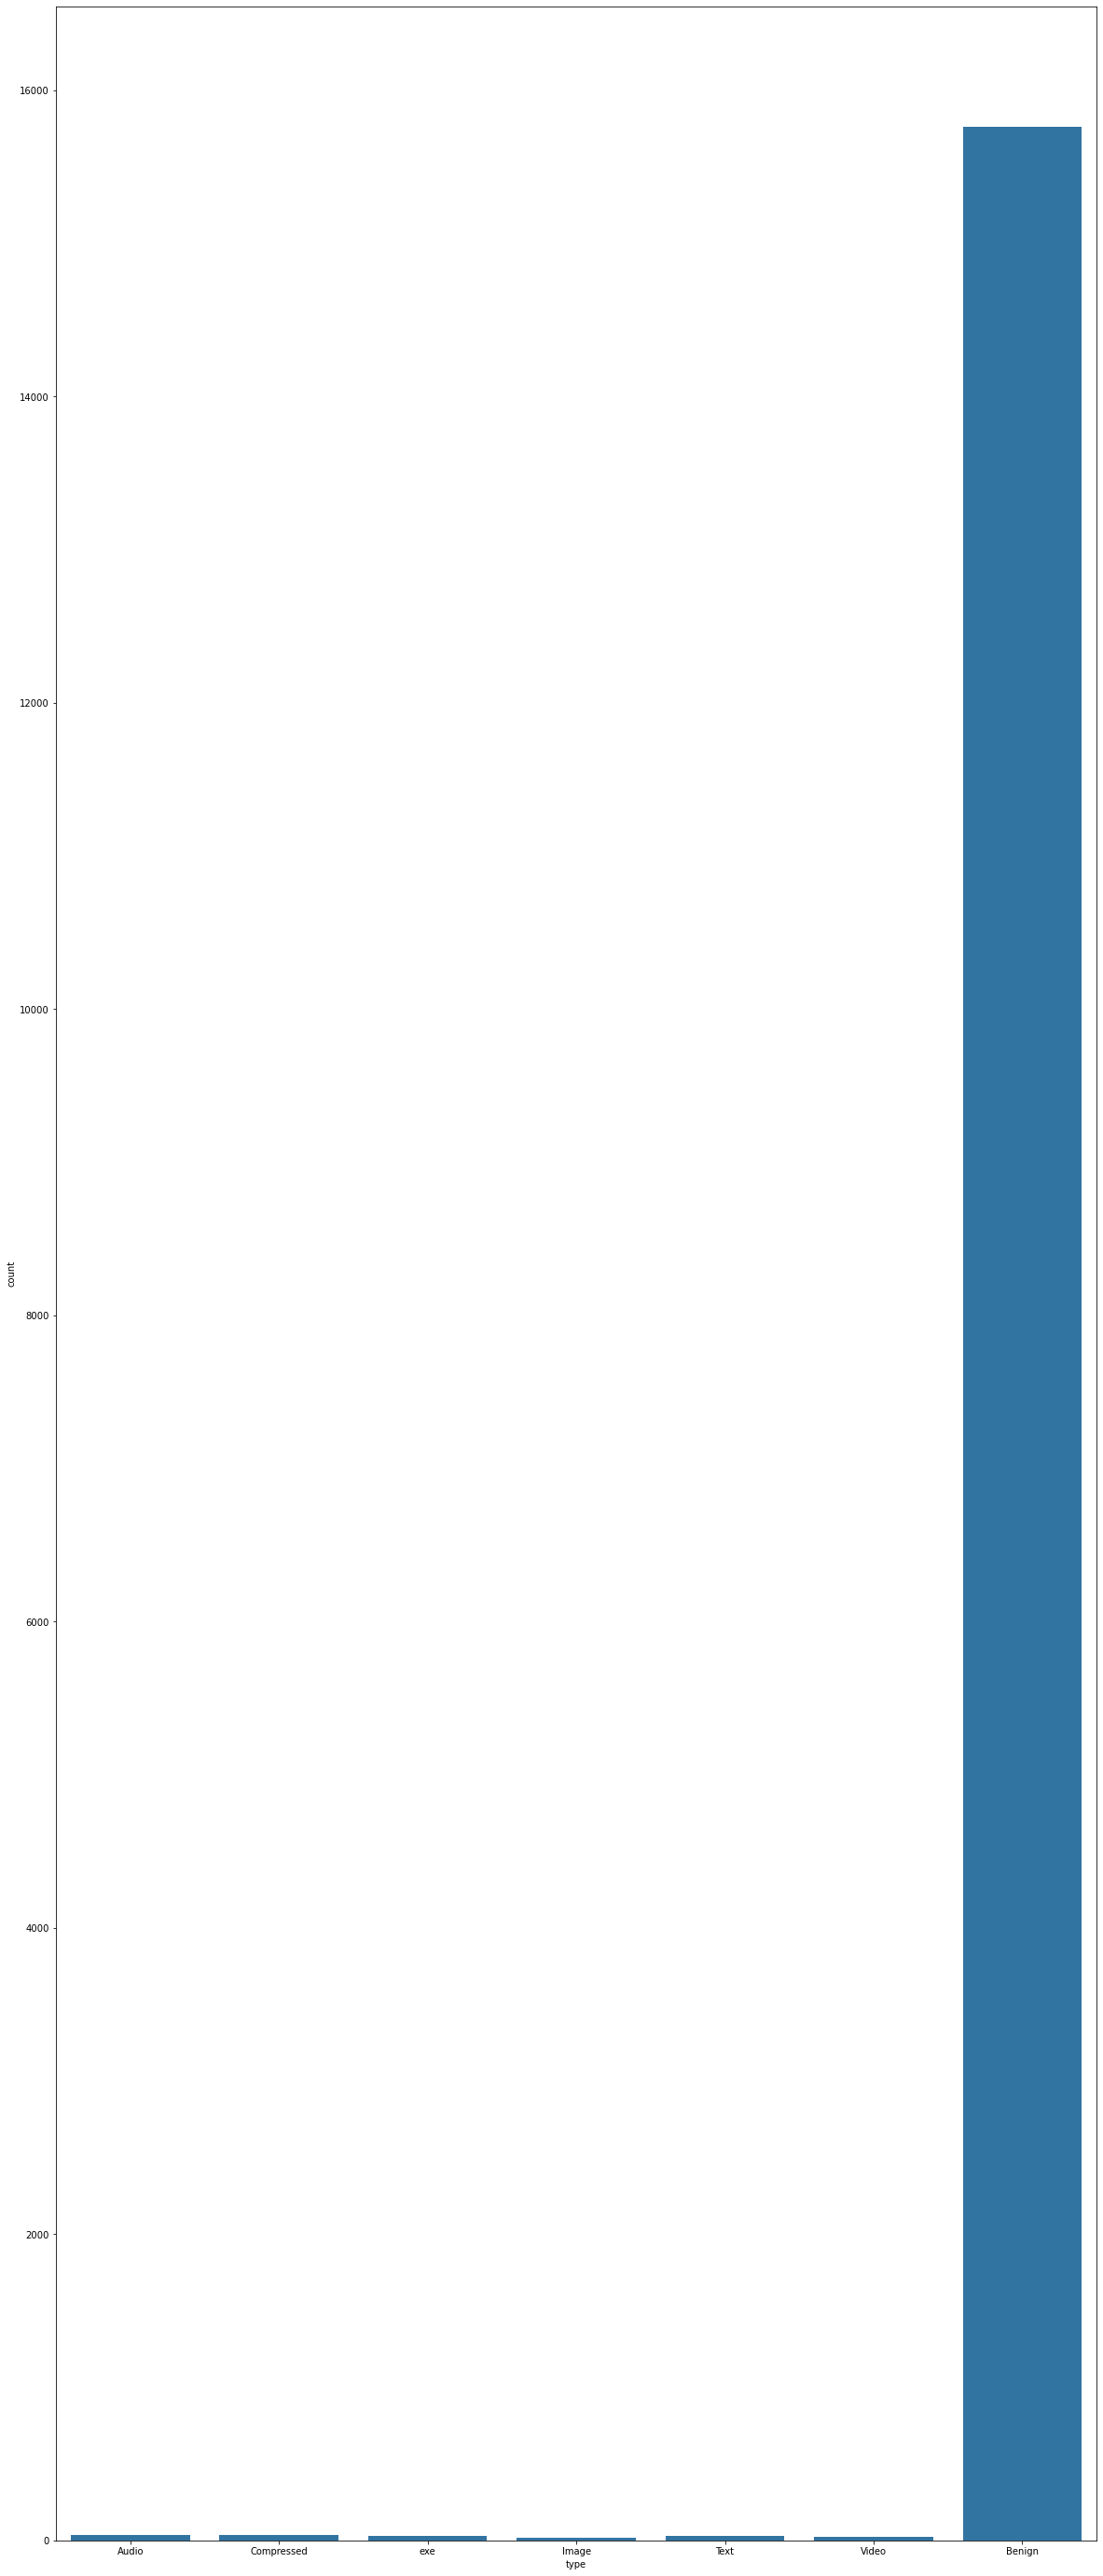

In [281]:
plt.figure(figsize=(20,50)) # this creates a figure 8 inch wide, 4 inch high
day2_plot=sns.countplot(x='type', data=day2,color='tab:blue')

In [529]:
df31=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Heavy Attacks\stateless_heavy\stateless_features-heavy_audio.pcap.xlsx',header=None)
df32=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Heavy Attacks\stateless_heavy\stateless_features-heavy_compressed.pcap.xlsx',header=None)
# df33=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Heavy Attacks\heavy_benign\stateless_benign_heavy\stateless_features-benign_heavy_1.pcap.xlsx',header=None)

In [530]:
df31=pre_process(df31)
df32=pre_process(df32)
# df33=pre_process(df33)

In [535]:
day3= pd.concat((df31,df32),ignore_index=True)
day3

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,type
0,25,8,0,10,9,2.55664,6,6,7,3.33333,2,192,12,1,Audio
1,25,8,0,10,9,2.55664,6,6,7,3.33333,2,192,12,1,Audio
2,15,0,11,0,3,3.625,1,1,15,15,C,DESKTOP-3JF04TC,16,0,Audio
3,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Audio
4,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Audio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71536,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,Compressed
71537,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1,Compressed
71538,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1,Compressed
71539,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Compressed


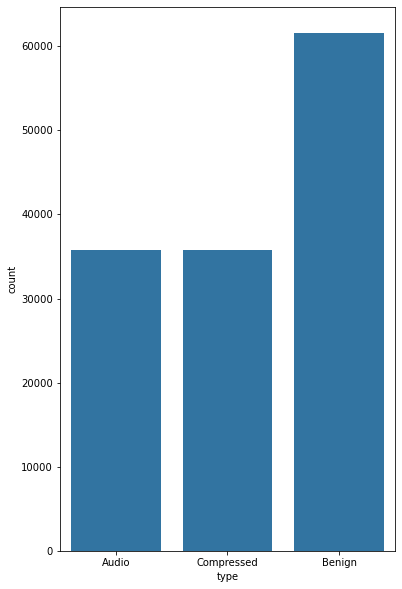

In [26]:
plt.figure(figsize=(6,10)) # this creates a figure 8 inch wide, 4 inch high
day3_plot=sns.countplot(x='type', data=day3,color='tab:blue')

In [531]:
df41=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Heavy Attacks\stateless_heavy\stateless_features-heavy_image.pcap.xlsx',header=None)
df42=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Heavy Attacks\stateless_heavy\stateless_features-heavy_text.pcap.xlsx',header=None)
# df43=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Heavy Attacks\heavy_benign\stateless_benign_heavy\stateless_features-benign_heavy_2.pcap.xlsx',header=None)

In [532]:
df41=pre_process(df41)
df42=pre_process(df42)
# df43=pre_process(df43)

In [536]:
day4= pd.concat((df41,df42),ignore_index=True)
day4

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,type
0,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Image
1,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Image
2,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,Image
3,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,Image
4,27,10,0,10,11,2.57042,6,6,7,3.66667,2,192,14,1,Image
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107483,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Text
107484,25,8,0,10,9,2.78622,6,6,7,3.33333,2,192,12,1,Text
107485,25,8,0,10,9,2.78622,6,6,7,3.33333,2,192,12,1,Text
107486,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Text


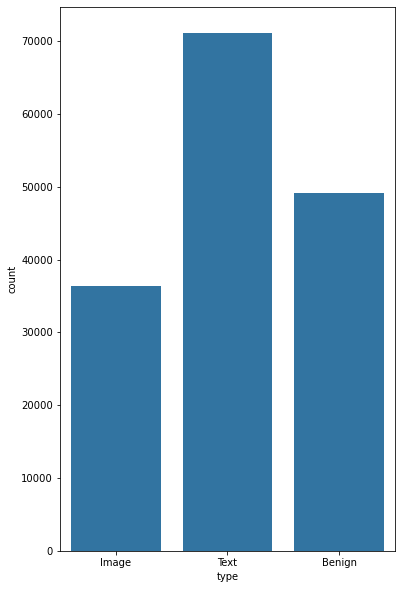

In [30]:
plt.figure(figsize=(6,10)) # this creates a figure 8 inch wide, 4 inch high
day4_plot=sns.countplot(x='type', data=day4,color='tab:blue')

In [533]:
df51=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Heavy Attacks\stateless_heavy\stateless_features-heavy_video.pcap.xlsx',header=None)
df52=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Heavy Attacks\stateless_heavy\stateless_features-heavy_exe.pcap.xlsx',header=None)
# df53=pd.read_excel(r'C:\Users\khana\Desktop\Network Security Machine Learning Winter 21-22 Research\Heavy Attacks\heavy_benign\stateless_benign_heavy\stateless_features-benign_heavy_3.pcap.xlsx',header=None)

In [534]:
df51=pre_process(df51)
df52=pre_process(df52)
# df53=pre_process(df53)

In [537]:
day5= pd.concat((df51,df52),ignore_index=True)
day5

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,type
0,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1,Video
1,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1,Video
2,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Video
3,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Video
4,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1,Video
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72636,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,exe
72637,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1,exe
72638,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1,exe
72639,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,exe


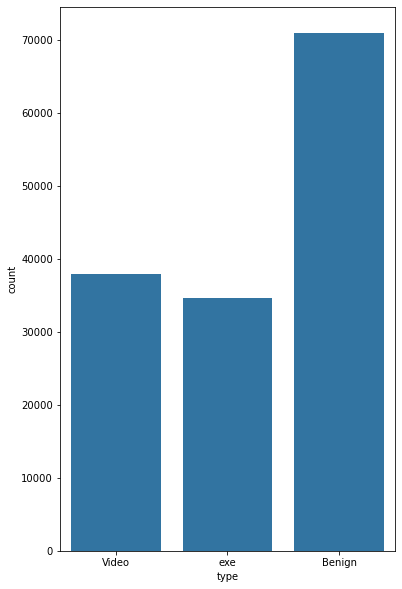

In [34]:
plt.figure(figsize=(6,10)) # this creates a figure 8 inch wide, 4 inch high
day5_plot=sns.countplot(x='type', data=day5,color='tab:blue')

In [538]:
heavy_attacks=pd.concat((day3,day4,day5),ignore_index=True)
heavy_attacks

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,type
0,25,8,0,10,9,2.55664,6,6,7,3.33333,2,192,12,1,Audio
1,25,8,0,10,9,2.55664,6,6,7,3.33333,2,192,12,1,Audio
2,15,0,11,0,3,3.625,1,1,15,15,C,DESKTOP-3JF04TC,16,0,Audio
3,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Audio
4,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,Audio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251665,27,10,0,10,11,2.76719,6,6,7,3.66667,2,192,14,1,exe
251666,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1,exe
251667,26,9,0,10,10,2.74234,6,6,7,3.5,2,192,13,1,exe
251668,24,7,0,10,8,2.05403,6,6,7,3.16667,4,224,11,1,exe


In [367]:
heavy_attacks.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,type
count,47795,47795,47795,47795,47795,47795.000,47795,47795,47795,47795.0,47789,47795,47795,47795,47795
unique,34,26,5,34,13,914.000,9,7,31,79.0,12273,32218,33,2,7
top,14,0,0,12,0,2.375,1,2,7,5.0,online,192,10,0,Benign
freq,4350,33030,47733,4682,44893,1526.000,27134,29749,5026,4598.0,281,127,4624,33030,47479


In [539]:
heavy_attacks=remove_dup(heavy_attacks)
#heavy_attacks=heavy_attacks.drop(['upper'], axis=1)
heavy_attacks.shape

(316, 15)

In [317]:
all_days= pd.concat((day1,day2,day3,day4,day5),ignore_index=True)
all_days=remove_dup(all_days)
all_days.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,type
count,102658,102658,102658,102658,102658,102658.000,102658,102658,102658,102658.0,102646,102658,102658,102658,102658
unique,35,26,6,34,14,1150.000,9,7,31,83.0,18000,67627,33,2,7
top,14,0,0,12,0,2.375,1,2,8,5.0,online,blogspot,10,0,Benign
freq,9442,70024,102597,10087,95560,3434.000,57810,63130,11378,10222.0,579,152,10231,70024,102327


In [319]:
all_days.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102658 entries, 0 to 121635
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   FQDN_count        102658 non-null  object
 1   subdomain_length  102658 non-null  object
 2   upper             102658 non-null  object
 3   lower             102658 non-null  object
 4   numeric           102658 non-null  object
 5   entropy           102658 non-null  object
 6   special           102658 non-null  object
 7   labels            102658 non-null  object
 8   labels_max        102658 non-null  object
 9   labels_average    102658 non-null  object
 10  longest_word      102646 non-null  object
 11  sld               102658 non-null  object
 12  len               102658 non-null  object
 13  subdomain         102658 non-null  object
 14  type              102658 non-null  object
dtypes: object(15)
memory usage: 12.5+ MB


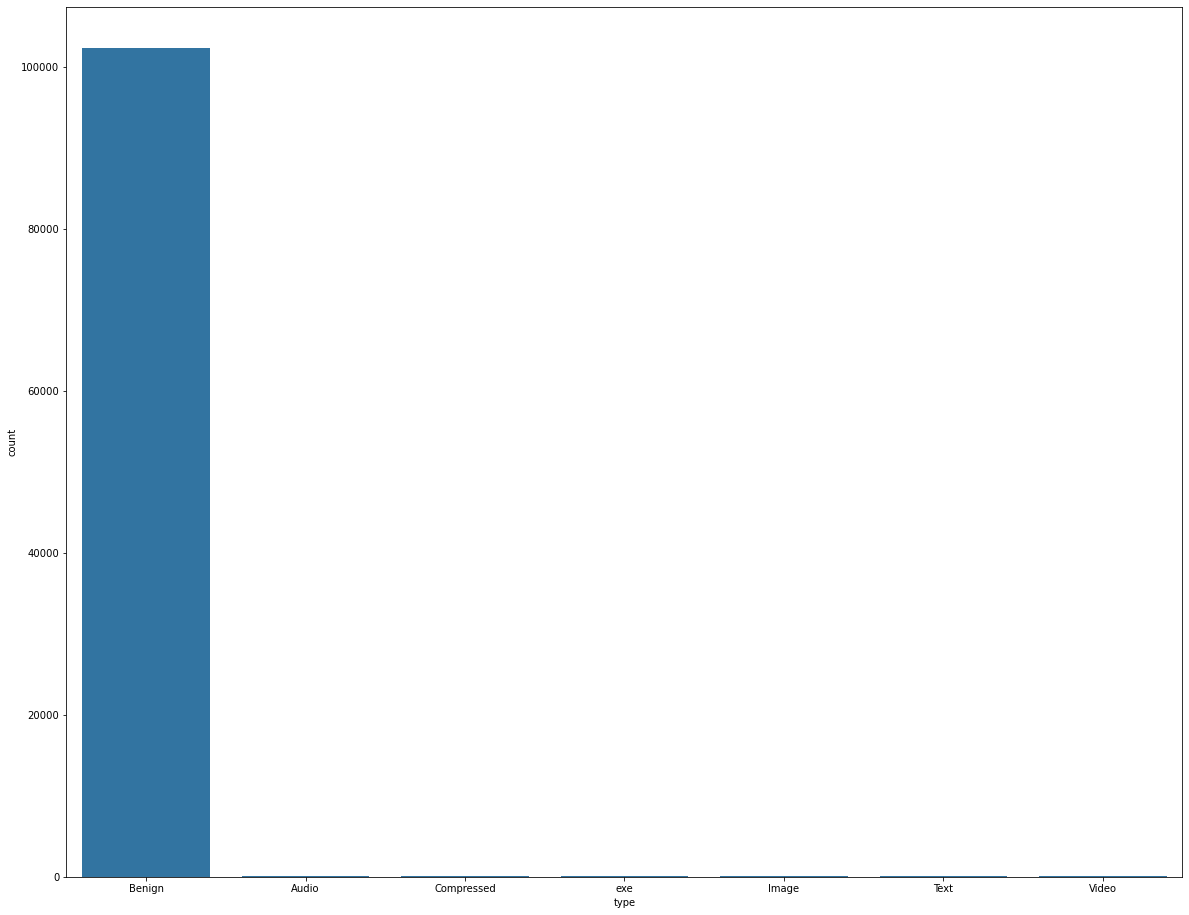

In [320]:
plt.figure(figsize=(20,16)) # this creates a figure 8 inch wide, 4 inch high
all_days_plot=sns.countplot(x='type', data=all_days,color='tab:blue')

## Train test split for each attack for each day

In [380]:
def split(data):
    Y = data['type']
    X = data.drop(['type'], axis = 1)
    #df.drop_duplicates(inplace=True)
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=101)
    return X_train,Y_train,X_test,Y_test

In [381]:
X_train_d1_b,Y_train_d1_b,X_test_d1_b,Y_test_d1_b=split(day1)
X_train_d2_audio,Y_train_d2_audio,X_test_d2_audio,Y_test_d2_audio=split(df21)
X_train_d2_comp,Y_train_d2_comp,X_test_d2_comp,Y_test_d2_comp=split(df22)
X_train_d2_exe,Y_train_d2_exe,X_test_d2_exe,Y_test_d2_exe=split(df23)
X_train_d2_img,Y_train_d2_img,X_test_d2_img,Y_test_d2_img=split(df24)
X_train_d2_txt,Y_train_d2_txt,X_test_d2_txt,Y_test_d2_txt=split(df25)
X_train_d2_vid,Y_train_d2_vid,X_test_d2_vid,Y_test_d2_vid=split(df26)
X_train_d2_b,Y_train_d2_b,X_test_d2_b,Y_test_d2_b=split(df27)

In [382]:
X_train_d3_b,Y_train_d3_b,X_test_d3_b,Y_test_d3_b=split(df33)
X_train_d3_audio,Y_train_d3_audio,X_test_d3_audio,Y_test_d3_audio=split(df31)
X_train_d3_comp,Y_train_d3_comp,X_test_d3_comp,Y_test_d3_comp=split(df32)

In [383]:
X_train_d4_img,Y_train_d4_img,X_test_d4_img,Y_test_d4_img=split(df41)
X_train_d4_txt,Y_train_d4_txt,X_test_d4_txt,Y_test_d4_txt=split(df42)
X_train_d4_b,Y_train_d4_b,X_test_d4_b,Y_test_d4_b=split(df43)

In [384]:
X_train_d5_vid,Y_train_d5_vid,X_test_d5_vid,Y_test_d5_vid=split(df51)
X_train_d5_exe,Y_train_d5_exe,X_test_d5_exe,Y_test_d5_exe=split(df52)
X_train_d5_b,Y_train_d5_b,X_test_d5_b,Y_test_d5_b=split(df53)

In [385]:
X_train_light= pd.concat((X_train_d2_audio,X_train_d2_comp,X_train_d2_exe,X_train_d2_img,X_train_d2_txt,X_train_d2_vid,X_train_d2_b),ignore_index=True)
Y_train_light= pd.concat((Y_train_d2_audio,Y_train_d2_comp,Y_train_d2_exe,Y_train_d2_img,Y_train_d2_txt,Y_train_d2_vid,Y_train_d2_b),ignore_index=True)
X_test_light= pd.concat((X_test_d2_audio,X_test_d2_comp,X_test_d2_exe,X_test_d2_img,X_test_d2_txt,X_test_d2_vid,X_test_d2_b),ignore_index=True)
Y_test_light= pd.concat((Y_test_d2_audio,Y_test_d2_comp,Y_test_d2_exe,Y_test_d2_img,Y_test_d2_txt,Y_test_d2_vid,Y_test_d2_b),ignore_index=True)

In [386]:
X_train_heavy= pd.concat((X_train_d3_audio,X_train_d3_comp,X_train_d5_exe,X_train_d4_img,X_train_d4_txt,X_train_d5_vid,X_train_d3_b,X_train_d4_b,X_train_d5_b),ignore_index=True)
Y_train_heavy= pd.concat((Y_train_d3_audio,Y_train_d3_comp,Y_train_d5_exe,Y_train_d4_img,Y_train_d4_txt,Y_train_d5_vid,Y_train_d3_b,Y_train_d4_b,Y_train_d5_b),ignore_index=True)
X_test_heavy= pd.concat((X_test_d3_audio,X_test_d3_comp,X_test_d5_exe,X_test_d4_img,X_test_d4_txt,X_test_d5_vid,X_test_d3_b,X_test_d4_b,X_test_d5_b),ignore_index=True)
Y_test_heavy= pd.concat((Y_test_d3_audio,Y_test_d3_comp,Y_test_d5_exe,Y_test_d4_img,Y_test_d4_txt,Y_test_d5_vid,Y_test_d3_b,Y_test_d4_b,Y_test_d5_b),ignore_index=True)

# Feature Engineering: Filling null values

In [394]:
print(X_test_light.isnull().values.sum())

1


In [396]:
print(X_test_light.isnull().sum())

0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        1
sld                 0
len                 0
subdomain           0
dtype: int64


In [397]:
#to insert the records with null values with the highest frequency value/category of that feature
X_train_light=X_train_light.fillna(X_train_light['longest_word'].value_counts().index[0])
X_test_light=X_test_light.fillna(X_test_light['longest_word'].value_counts().index[0])

In [398]:
print(X_test_heavy.isnull().values.sum())

1


In [399]:
print(X_train_heavy.isnull().sum())

0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        5
sld                 0
len                 0
subdomain           0
dtype: int64


In [400]:
X_train_heavy=X_train_heavy.fillna(X_train_heavy['longest_word'].value_counts().index[0])
X_test_heavy=X_test_heavy.fillna(X_test_heavy['longest_word'].value_counts().index[0])

In [419]:
X_test_light.nunique()

0
FQDN_count            33
subdomain_length      21
upper                  4
lower                 33
numeric               13
entropy              414
special                8
labels                 6
labels_max            29
labels_average        62
longest_word        3099
sld                 4265
len                   31
subdomain              2
dtype: int64

In [408]:
X_train_heavy.nunique()

0
FQDN_count             34
subdomain_length       26
upper                   5
lower                  34
numeric                13
entropy               804
special                 9
labels                  7
labels_max             31
labels_average         76
longest_word        10758
sld                 25458
len                    33
subdomain               2
dtype: int64

# Further Data Cleaning

In [418]:
X_train_light=X_train_light.drop(['upper'], axis=1)

KeyError: "['upper'] not found in axis"

In [421]:
X_test_light=X_test_light.drop(['upper'], axis=1)

In [422]:
X_train_heavy=X_train_heavy.drop(['upper'], axis=1)
X_test_heavy=X_test_heavy.drop(['upper'], axis=1)

In [424]:
X_train_heavy

,FQDN_count,subdomain_length,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,27,10,10,11,2.910052,6,6,7,3.666667,2,192,14,1
1,27,10,10,11,2.570417,6,6,7,3.666667,2,192,14,1
2,12,3,10,0,2.030639,2,3,4,3.333333,bing,bing,8,1
3,27,10,10,11,2.535401,6,6,7,3.666667,2,192,14,1
4,28,11,10,12,2.205789,6,6,7,3.833333,9,239,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33446,11,0,8,2,2.817711,1,2,8,5.000000,a,74kolesa,9,0
33447,20,0,19,0,3.229658,1,2,17,9.500000,amsterdam,veldwerkamsterdam,18,0
33448,18,3,16,0,2.856131,2,3,10,5.333333,empire,empireblue,14,1
33449,24,0,23,0,3.099593,1,2,20,11.500000,princesses,piratesandprincesses,21,0


# Feature Engineering: Categorical Encoding

In [425]:
Y_train_light=Y_train_light.replace(to_replace={'Benign':0,'Audio':1,'Compressed':1,'exe':1,'Image':1,'Text':1,'Video':1})
Y_test_light=Y_test_light.replace(to_replace={'Benign':0,'Audio':1,'Compressed':1,'exe':1,'Image':1,'Text':1,'Video':1})

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [426]:
Y_train_heavy=Y_train_heavy.replace(to_replace={'Benign':0,'Audio':1,'Compressed':1,'exe':1,'Image':1,'Text':1,'Video':1})
Y_test_heavy=Y_test_heavy.replace(to_replace={'Benign':0,'Audio':1,'Compressed':1,'exe':1,'Image':1,'Text':1,'Video':1})

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [431]:
Y_test_light

0       1
1       1
2       1
3       1
4       1
       ..
4780    0
4781    0
4782    0
4783    0
4784    0
Name: type, Length: 4785, dtype: int64

In [432]:
X_test_light.describe()

,FQDN_count,subdomain_length,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain
count,4785.00000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000
mean,14.86813,1.094253,13.062905,0.175549,2.629006,1.573459,2.425705,9.460188,5.748467,11.456635,0.304702
std,4.73512,2.090975,4.401326,0.950768,0.518426,0.763456,0.622501,4.152070,2.272883,4.515332,0.460329
min,2.00000,0.000000,0.000000,0.000000,0.311278,0.000000,1.000000,2.000000,2.000000,3.000000,0.000000
25%,11.00000,0.000000,10.000000,0.000000,2.349039,1.000000,2.000000,6.000000,4.333333,8.000000,0.000000
50%,14.00000,0.000000,13.000000,0.000000,2.712675,1.000000,2.000000,9.000000,5.500000,11.000000,0.000000
75%,17.00000,3.000000,16.000000,0.000000,2.965497,2.000000,3.000000,12.000000,7.000000,14.000000,1.000000
max,36.00000,23.000000,34.000000,12.000000,3.995839,7.000000,6.000000,32.000000,32.000000,33.000000,1.000000


In [445]:
X_train_light['longest_word'].unique()

array([2, 'tap', 'microsoft', ..., 'linkin', 'sis', 'searching'],
      dtype=object)

In [449]:
X_train_light['longest_word'].value_counts().iloc[:60]

2            68
online       59
s            49
shop         40
news         37
sports       27
n            27
e            25
xn           25
world        24
digital      23
money        23
media        21
bank         21
a            21
microsoft    20
tv           19
t            19
express      19
video        18
global       18
city         17
sport        17
local        17
travel       16
film         16
games        16
net          16
game         15
health       15
soft         15
c            14
o            14
blog         14
r            14
portal       14
blogspot     14
daily        13
group        13
store        13
google       13
market       13
point        13
fashion      13
free         12
bet          12
ub           12
manga        12
i            12
kitchen      12
movie        12
com          12
movies       12
cloud        12
line         12
share        11
the          11
mobile       11
education    11
ten          11
Name: longest_word, dtype: int64

In [450]:
def conversion(l_word_count):
    str_list=[]
    ascii_val=[]
    words=np.array(l_word_count)
    for index, value in enumerate(words):
        words[index] = str(words[index])
    for word in words:
        c=0
        ascii_sum=0
        str_list=list(word)
        for char in str_list:
            ascii_sum+=ord(char)
            c=c+1
        ascii_val.append(ascii_sum/c)
    return ascii_val

In [451]:
X_train_light['longest_word']=conversion(X_train_light['longest_word'])
X_train_light['sld']=conversion(X_train_light['sld'])

In [452]:
X_test_light['longest_word']=conversion(X_test_light['longest_word'])
X_test_light['sld']=conversion(X_test_light['sld'])

In [457]:
#plt.figure(figsize=(20,16)) # this creates a figure 8 inch wide, 4 inch high
X_train_light.corr()
#sns.heatmap(corr_light)

,FQDN_count,subdomain_length,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,,,,,,,,,,,,,
FQDN_count,1.000000,0.481942,0.909610,0.190211,0.755647,0.483404,0.417081,0.842876,0.659398,-0.140128,-0.128435,0.954430,0.431171
subdomain_length,0.481942,1.000000,0.341308,0.303159,0.190458,0.669318,0.739936,0.021809,-0.121984,-0.213211,-0.160959,0.383881,0.805216
lower,0.909610,0.341308,1.000000,-0.100498,0.783836,0.279405,0.250679,0.836873,0.597825,0.110625,0.180208,0.905231,0.340838
numeric,0.190211,0.303159,-0.100498,1.000000,0.026766,0.417727,0.363865,-0.014637,-0.024597,-0.599896,-0.776114,0.062377,0.096851
entropy,0.755647,0.190458,0.783836,0.026766,1.000000,0.157010,0.029021,0.803239,0.658975,0.035620,0.012547,0.816690,0.142118
special,0.483404,0.669318,0.279405,0.417727,0.157010,1.000000,0.850566,0.053533,-0.158946,-0.287629,-0.379504,0.301024,0.648121
labels,0.417081,0.739936,0.250679,0.363865,0.029021,0.850566,1.000000,-0.099069,-0.335908,-0.281525,-0.216884,0.195707,0.784790
labels_max,0.842876,0.021809,0.836873,-0.014637,0.803239,0.053533,-0.099069,1.000000,0.902257,0.005184,-0.017490,0.923654,0.001963
labels_average,0.659398,-0.121984,0.597825,-0.024597,0.658975,-0.158946,-0.335908,0.902257,1.000000,-0.041537,-0.074304,0.772654,-0.203696


In [456]:
X_train_light

,FQDN_count,subdomain_length,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,25,8,10,9,2.786216,6,6,7,3.333333,50.000000,52.000000,12,1
1,6,0,6,0,2.120590,0,1,6,6.000000,108.333333,107.000000,7,0
2,29,15,23,2,3.787906,4,5,9,5.000000,109.111111,109.111111,25,1
3,12,3,10,0,2.030639,2,3,4,3.333333,104.000000,104.000000,8,1
4,25,8,10,9,2.556642,6,6,7,3.333333,50.000000,52.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11152,10,0,6,3,1.834876,1,2,6,4.500000,111.666667,80.000000,7,0
11153,11,0,10,0,2.373267,1,2,8,5.000000,103.500000,105.625000,9,0
11154,18,0,17,0,2.929439,1,2,14,8.500000,104.875000,103.642857,15,0
11155,19,0,17,0,3.375000,2,2,15,9.000000,105.333333,100.666667,16,0


In [135]:
# X_train_light=X_train_light.astype({'FQDN_count':int, 'subdomain_length': int,'upper':int, 'lower':int,'numeric':int, 'entropy':float, 'special':int, 'labels':int, 'labels_max':int, 'labels_average':float, 'len':int, 'subdomain':int })
# X_test_light=X_test_light.astype({'FQDN_count':int, 'subdomain_length': int,'upper':int, 'lower':int,'numeric':int, 'entropy':float, 'special':int, 'labels':int, 'labels_max':int, 'labels_average':float, 'len':int, 'subdomain':int })

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30836 entries, 0 to 30835
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FQDN_count        30836 non-null  int32  
 1   subdomain_length  30836 non-null  int32  
 2   upper             30836 non-null  int32  
 3   lower             30836 non-null  int32  
 4   numeric           30836 non-null  int32  
 5   entropy           30836 non-null  float64
 6   special           30836 non-null  int32  
 7   labels            30836 non-null  int32  
 8   labels_max        30836 non-null  int32  
 9   labels_average    30836 non-null  float64
 10  longest_word      30836 non-null  float64
 11  sld               30836 non-null  float64
 12  len               30836 non-null  int32  
 13  subdomain         30836 non-null  int32  
dtypes: float64(4), int32(10)
memory usage: 2.1 MB


In [183]:
encoder= ce.BinaryEncoder(cols=['longest_word','sld'],return_df=True)

In [188]:
X_train_light=encoder.fit_transform(X_train_light) 

In [189]:
X_test_light=encoder.fit_transform(X_test_light) 

In [191]:
X_train_heavy=encoder.fit_transform(X_train_heavy) 

In [192]:
X_test_heavy=encoder.fit_transform(X_test_heavy) 

In [193]:
X_test_light[20000:]

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,...,sld_5,sld_6,sld_7,sld_8,sld_9,sld_10,sld_11,sld_12,len,subdomain
20000,11,3,0,9,0,2.030639,2,3,4,3.000000,...,0,1,0,1,0,1,0,1,8,1
20001,12,0,0,11,0,2.817711,1,2,8,5.500000,...,0,0,1,0,1,1,0,0,9,0
20002,26,9,0,10,10,2.742338,6,6,7,3.500000,...,0,0,0,0,0,0,0,1,13,1
20003,28,11,0,10,12,2.205789,6,6,7,3.833333,...,0,0,0,0,0,1,1,1,15,1
20004,16,0,0,15,0,3.261944,1,2,12,7.500000,...,0,0,1,0,1,1,0,1,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30831,26,9,0,10,10,2.742338,6,6,7,3.500000,...,0,0,0,0,0,0,0,1,13,1
30832,7,0,0,6,0,1.857542,1,2,4,3.000000,...,1,0,0,1,1,1,1,1,5,0
30833,26,9,0,10,10,2.742338,6,6,7,3.500000,...,0,0,0,0,0,0,0,1,13,1
30834,19,0,0,18,0,3.214383,1,2,16,9.000000,...,1,0,1,0,0,0,0,0,17,0


In [458]:
X_train_heavy['longest_word']=conversion(X_train_heavy['longest_word'])
X_train_heavy['sld']=conversion(X_train_heavy['sld'])

In [459]:
X_test_heavy['longest_word']=conversion(X_test_heavy['longest_word'])
X_test_heavy['sld']=conversion(X_test_heavy['sld'])

In [460]:
X_test_heavy

,FQDN_count,subdomain_length,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,15,0,0,3,3.625000,1,1,15,15.000000,67.000000,68.600000,16,0
1,26,9,10,10,2.588491,6,6,7,3.500000,50.000000,52.000000,13,1
2,32,0,0,0,3.044997,0,1,32,32.000000,77.000000,70.125000,33,0
3,10,4,9,0,2.589735,1,2,5,4.500000,104.600000,104.600000,10,1
4,16,2,14,0,2.889975,2,3,9,4.666667,109.111111,109.111111,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14339,13,0,12,0,2.625000,1,2,7,6.000000,109.750000,108.714286,8,0
14340,19,0,18,0,3.375000,1,2,15,9.000000,107.333333,108.000000,16,0
14341,15,0,14,0,3.108098,1,2,12,7.000000,113.333333,109.000000,13,0
14342,19,0,18,0,3.077820,1,2,15,9.000000,105.000000,108.533333,16,0


In [137]:
# X_train_heavy=X_train_heavy.astype({'FQDN_count':int, 'subdomain_length': int,'upper':int, 'lower':int,'numeric':int, 'entropy':float, 'special':int, 'labels':int, 'labels_max':int, 'labels_average':float, 'len':int, 'subdomain':int })
# X_test_heavy=X_test_heavy.astype({'FQDN_count':int, 'subdomain_length': int,'upper':int, 'lower':int,'numeric':int, 'entropy':float, 'special':int, 'labels':int, 'labels_max':int, 'labels_average':float, 'len':int, 'subdomain':int })

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130013 entries, 0 to 130012
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FQDN_count        130013 non-null  int32  
 1   subdomain_length  130013 non-null  int32  
 2   upper             130013 non-null  int32  
 3   lower             130013 non-null  int32  
 4   numeric           130013 non-null  int32  
 5   entropy           130013 non-null  float64
 6   special           130013 non-null  int32  
 7   labels            130013 non-null  int32  
 8   labels_max        130013 non-null  int32  
 9   labels_average    130013 non-null  float64
 10  longest_word      130013 non-null  float64
 11  sld               130013 non-null  float64
 12  len               130013 non-null  int32  
 13  subdomain         130013 non-null  int32  
dtypes: float64(4), int32(10)
memory usage: 8.9 MB


# Decision Tree Classifier

In [461]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf_heavy = tree.DecisionTreeClassifier(criterion='entropy')

In [462]:
X_test_heavy.shape

(14344, 13)

In [463]:
clf.fit(X_train_light,Y_train_light)
clf_heavy.fit(X_train_heavy,Y_train_heavy)

DecisionTreeClassifier(criterion='entropy')

In [464]:
Y_pred_light_dt=clf.predict(X_test_light)
Y_pred_heavy_dt=clf_heavy.predict(X_test_heavy)

In [465]:
print(classification_report(Y_test_light,Y_pred_light_dt))
#precision=true positive/true positive + false positive
#recall=true positive/true positive + false negative
#in this case, the classifier identified benign attacks as light attacks 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4728
           1       0.83      0.84      0.83        57

    accuracy                           1.00      4785
   macro avg       0.91      0.92      0.92      4785
weighted avg       1.00      1.00      1.00      4785



In [466]:
print(classification_report(Y_test_heavy,Y_pred_heavy_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14245
           1       0.67      0.71      0.69        99

    accuracy                           1.00     14344
   macro avg       0.84      0.85      0.84     14344
weighted avg       1.00      1.00      1.00     14344



In [467]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [471]:
cm_light_dt = confusion_matrix(Y_test_light,Y_pred_light_dt)
cm_heavy_dt = confusion_matrix(Y_test_heavy,Y_pred_heavy_dt)

In [491]:
cm_light_dt

array([[4718,   10],
       [   9,   48]], dtype=int64)

In [472]:
accuracy(cm_heavy_dt)*100

99.56079196876743

In [473]:
accuracy(cm_light_dt)*100

99.60292580982237

In [91]:
rf_clf=RandomForestClassifier(n_estimators=200,criterion='gini')

In [69]:
rf_clf.fit(X_train_d2,Y_train_d2)

RandomForestClassifier(n_estimators=200)

In [70]:
Y_pred_d2_rf=rf_clf.predict(X_test_d2)

In [71]:
print(classification_report(Y_test_d2,Y_pred_d2_rf))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76     18028
           1       0.64      1.00      0.78     12808

    accuracy                           0.77     30836
   macro avg       0.82      0.80      0.77     30836
weighted avg       0.85      0.77      0.77     30836



In [72]:
cm_rf = confusion_matrix(Y_test_d2,Y_pred_d2_rf)

In [73]:
accuracy(cm_rf)*100

77.01063691788819

In [75]:
scaler = sk_preprocessing.StandardScaler()
scaler.fit(X_train_d2)
X_train_d2_scaled = scaler.transform(X_train_d2)
X_test_d2_scaled = scaler.transform(X_test_d2)

In [76]:
X_train_d2_scaled

array([[ 0.87910642,  1.10705332, -0.1605114 , ..., -0.6506116 ,
         0.38359825,  0.66024002],
       [ 0.40749183,  0.37073959, -0.1605114 , ..., -0.6582161 ,
        -0.33323703,  0.66024002],
       [ 0.40749183,  0.37073959, -0.1605114 , ..., -0.6582161 ,
        -0.33323703,  0.66024002],
       ...,
       [ 0.40749183,  0.37073959, -0.1605114 , ..., -0.6582161 ,
        -0.33323703,  0.66024002],
       [ 0.87910642,  1.10705332, -0.1605114 , ..., -0.6506116 ,
         0.38359825,  0.66024002],
       [ 0.40749183,  0.37073959, -0.1605114 , ..., -0.6582161 ,
        -0.33323703,  0.66024002]])

In [76]:
svc = SVC()
svc.fit(X_train_d2_scaled, Y_train_d2.values.ravel())
Y_pred_d2_svm = svc.predict(X_test_d2_scaled)
cm_svm = confusion_matrix(Y_test_d2, Y_pred_d2_svm)

In [77]:
accuracy(cm_svm)*100

76.99117914126346

In [78]:
print(classification_report(Y_test_d2,Y_pred_d2_svm))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76     18028
           1       0.64      1.00      0.78     12808

    accuracy                           0.77     30836
   macro avg       0.82      0.80      0.77     30836
weighted avg       0.85      0.77      0.77     30836



# ANN

In [498]:
model = Sequential()
model.add(Dense(14, input_dim=14, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])


In [501]:
scaler_ann=MinMaxScaler()

In [502]:
X_train_d2_ann=scaler_ann.fit_transform(X_train_d2)
X_train_d2_ann.shape

ValueError: could not convert string to float: 'windows'

In [165]:
X_test_d2_ann=scaler_ann.transform(X_test_d2)
X_test_d2_ann.mean()

0.3634255714330055

In [166]:
Y_train_d2_ann=Y_train_d2.values
Y_test_d2_ann=Y_test_d2.values

In [201]:
earlystop=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)

In [222]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [499]:
model.fit(X_train_d2_ann, Y_train_d2_ann, epochs=70, batch_size=100, validation_data=(X_test_d2_ann,Y_test_d2_ann), callbacks=[earlystop])

NameError: name 'X_train_d2_ann' is not defined

<AxesSubplot:>

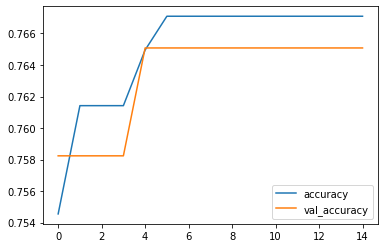

In [204]:
losses=pd.DataFrame(model.history.history)
accuracyy=losses[['accuracy', 'val_accuracy']]
accuracyy.plot()

<AxesSubplot:>

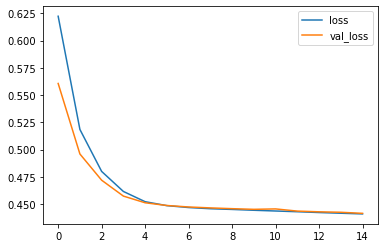

In [205]:
losses=losses.drop(['accuracy', 'val_accuracy'], axis=1)
losses.plot()

In [219]:
#Y_pred_d2_ann=model.predict_classes(X_test_d2_ann)
#predict_x=model.predict(X_test_d2_ann) 
Y_pred_d2_ann = (model.predict(X_test_d2_ann) > 0.5).astype("int32")


In [223]:
print(classification_report(Y_test_d2_ann,Y_pred_d2_ann))

              precision    recall  f1-score   support

           0       0.97      0.62      0.75     18028
           1       0.64      0.97      0.77     12808

    accuracy                           0.77     30836
   macro avg       0.81      0.80      0.76     30836
weighted avg       0.83      0.77      0.76     30836



In [226]:
cm_d2_ann=confusion_matrix(Y_test_d2_ann,Y_pred_d2_ann)

In [227]:
accuracy(cm_d2_ann)

0.7650797768841614